# Trabajo Practico 5 - Bautista Marelli

In [2]:
# Importamos las librerias que necesitamos
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Separar train, val, test sets
from sklearn.model_selection import train_test_split

In [3]:
def plot_error_model(model, history, title):
  train_errors = [1 - x for x in history.history['accuracy']]
  val_errors = [1 - x for x in history.history['val_accuracy']]

  x_vals = range(1, len(train_errors)+1)

  plt.plot(x_vals, train_errors, label='Train Errors')
  plt.plot(x_vals, val_errors, label = 'Val Errors')
  plt.ylabel('Error')
  plt.legend()
  plt.title(title)
  plt.show()


# Ejercicio 1

Epoch 1/10
1250/1250 [==============================] - 7s 5ms/step - loss: 1.5598 - accuracy: 0.4242 - val_loss: 1.2214 - val_accuracy: 0.5561
Epoch 2/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1369 - accuracy: 0.5921 - val_loss: 1.0277 - val_accuracy: 0.6317
Epoch 3/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9510 - accuracy: 0.6633 - val_loss: 1.0128 - val_accuracy: 0.6420
Epoch 4/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8421 - accuracy: 0.7003 - val_loss: 0.9556 - val_accuracy: 0.6649
Epoch 5/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.7481 - accuracy: 0.7362 - val_loss: 0.8836 - val_accuracy: 0.6903
Epoch 6/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.6748 - accuracy: 0.7589 - val_loss: 0.9471 - val_accuracy: 0.6844
Epoch 7/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.6071 - accuracy: 0.7854 - val_loss: 0.9427 - val_accuracy:

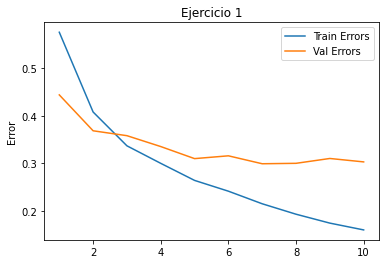

In [4]:
def ejercicio_1():
  (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

  # Normalizamos
  train_images, test_images = train_images / 255.0, test_images / 255.0

  # Separamos los train y val sets
  train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=0)

  # Creamos el modelo
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.Flatten())
  model.add(layers.Dense(64))
  model.add(layers.Dense(128))
  model.add(layers.Dense(128))
  model.add(layers.Dense(10))

  # Compilamos el modelo
  model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

  history = model.fit(
      train_images, 
      train_labels, 
      epochs=10, 
      validation_data=(val_images, val_labels)
  )
  
  test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
  print(f"Modelo Final - Test Error: {1 - test_acc}")
  
  return model, history

model1, history1 = ejercicio_1()
plot_error_model(model1, history1, 'Ejercicio 1')


# Conclusiones
A simple vista se puede ver el sobreajuste que realiza el modelo. A medida que aumentan las epocas, el modelo sobreajusta a los detalles de los datos de entrenamiento y lleva a tener un modelo con un error de test del `30%`.
En mi opinion esto se debe a como fue planteado el modelo, con las capas conv principalmente. Capaz cambiando un poco los filtros, podemos llegar a un mejor model que resuelva mejor el problema. Esto lo podemos ver mas adelante en el ejercicio 3 ya que duplicando la cantidad de filtros del ultimo par de capas conv tiene como resultado una mejora en el modelo.

Luego queria destacar que el aumento de epocas no llevo a una mejora al modelo y llevo a un mayor sobreajuste.

# Ejercicio 2

In [ ]:
def ejercicio_2():
  p_vals = [.2, .5]
  ms = {}
  for p in p_vals:
    md = models.Sequential()
    md.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    md.add(layers.MaxPooling2D((2, 2)))
    md.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    md.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    md.add(layers.MaxPooling2D((2, 2)))
    md.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    md.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    # Dropout
    md.add(layers.Dropout(p))
    md.add(layers.Flatten())
    md.add(layers.Dense(64))
    # Dropout
    md.add(layers.Dropout(p))
    md.add(layers.Dense(128))
    md.add(layers.Dense(128))
    md.add(layers.Dense(10))

    ms[p] = md
  
  models_results = []
  for p, model in ms.items():
    (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

    # Normalizamos
    train_images, test_images = train_images / 255.0, test_images / 255.0

    # Separamos los train y val sets
    train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=0)

    # Compilamos el modelo
    model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

    history = model.fit(
        train_images, 
        train_labels, 
        epochs=20, 
        validation_data=(val_images, val_labels)
    )
    
    test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
    print(f"Modelo Final p = {p} - Test Error: {1 - test_acc}")

    models_results.append((model, history))

  return models_results

Epoch 1/20
1250/1250 [==============================] - 7s 5ms/step - loss: 1.5474 - accuracy: 0.4291 - val_loss: 1.2269 - val_accuracy: 0.5533
Epoch 2/20
1250/1250 [==============================] - 7s 5ms/step - loss: 1.1695 - accuracy: 0.5840 - val_loss: 1.0540 - val_accuracy: 0.6231
Epoch 3/20
1250/1250 [==============================] - 7s 5ms/step - loss: 0.9944 - accuracy: 0.6495 - val_loss: 0.9944 - val_accuracy: 0.6492
Epoch 4/20
1250/1250 [==============================] - 7s 5ms/step - loss: 0.8866 - accuracy: 0.6879 - val_loss: 0.9323 - val_accuracy: 0.6744
Epoch 5/20
1250/1250 [==============================] - 7s 5ms/step - loss: 0.8093 - accuracy: 0.7163 - val_loss: 0.8910 - val_accuracy: 0.6874
Epoch 6/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.7480 - accuracy: 0.7369 - val_loss: 0.8535 - val_accuracy: 0.7102
Epoch 7/20
1250/1250 [==============================] - 7s 5ms/step - loss: 0.6883 - accuracy: 0.7588 - val_loss: 0.8198 - val_accuracy:

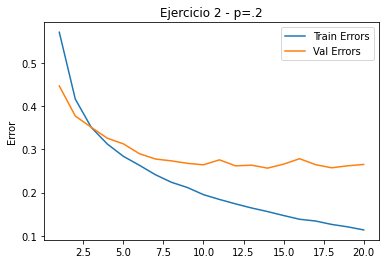

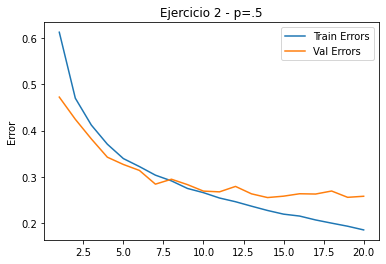

In [ ]:
models_results = ejercicio_2()
_model1, _history1 = models_results[0]
plot_error_model(_model1, _history1, 'Ejercicio 2 - p=.2')
_model2, _history2 = models_results[1]
plot_error_model(_model2, _history2, 'Ejercicio 2 - p=.5')

# Conclusiones
Lo principal que podemos ver es como el modelo con un Dropout de `p=.5` obtenemos un bajo nivel de sobreajuste en comparacion al modelo con `p=.2`. Con respecto al ejercicio anterior podemos ver mejoras en relacion al error de test (el cual disminuyo un 3/4 %) por lo que modemos decir que agrerar la capa de Dropout con cualquiera de los 2 valores lleva a una mejora en el modelo (y si utilizamos `p=.5` mejor).

Para concluir, agregar la capa de Dropout no solo mejoro el sobreajuste sino que tambien mejoro la precision del modelo (para ambos valores de p).

# Ejercicio 3

170508288/170498071 [==============================] - 13s 0us/step
Epoch 1/20
1250/1250 [==============================] - 20s 6ms/step - loss: 1.7598 - accuracy: 0.3517 - val_loss: 1.4652 - val_accuracy: 0.4689
Epoch 2/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.4815 - accuracy: 0.4611 - val_loss: 1.5024 - val_accuracy: 0.4863
Epoch 3/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.3619 - accuracy: 0.5116 - val_loss: 1.2075 - val_accuracy: 0.5724
Epoch 4/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.2937 - accuracy: 0.5401 - val_loss: 1.1207 - val_accuracy: 0.5965
Epoch 5/20
1250/1250 [==============================] - 7s 6ms/step - loss: 1.2416 - accuracy: 0.5587 - val_loss: 1.1484 - val_accuracy: 0.5974
Epoch 6/20
1250/1250 [==============================] - 7s 6ms/step - loss: 1.1962 - accuracy: 0.5774 - val_loss: 1.0932 - val_accuracy: 0.6091
Epoch 7/20
1250/1250 [==============================] - 8s 6ms/step

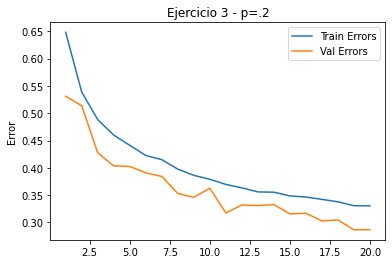

In [4]:
def ejercicio_3():
  (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

  # Normalizamos
  train_images, test_images = train_images / 255.0, test_images / 255.0

  # Separamos los train y val sets
  train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=0)

  # Creamos el modelo
  img_height = 32
  img_width = 32
  data_augmentation = keras.Sequential(
      [
            layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
            layers.RandomRotation(0.1),
            layers.RandomZoom(0.1),
      ]
  )

  model = models.Sequential()
  model.add(data_augmentation)
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  # Dropout
  model.add(layers.Dropout(.2))
  model.add(layers.Flatten())
  model.add(layers.Dense(64))
  # Dropout
  model.add(layers.Dropout(.2))
  model.add(layers.Dense(128))
  model.add(layers.Dense(128))
  model.add(layers.Dense(10))

  # Compilamos el modelo
  model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

  history = model.fit(
      train_images, 
      train_labels, 
      epochs=20, 
      validation_data=(val_images, val_labels)
  )
  
  test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
  print(f"Modelo Final - Test Error: {1 - test_acc}")
  
  return model, history

model3, history3 = ejercicio_3()
plot_error_model(model3, history3, 'Ejercicio 3 - p=.2')

Epoch 1/20
1250/1250 [==============================] - 9s 7ms/step - loss: 1.8380 - accuracy: 0.3155 - val_loss: 1.5716 - val_accuracy: 0.4278
Epoch 2/20
1250/1250 [==============================] - 7s 6ms/step - loss: 1.5760 - accuracy: 0.4237 - val_loss: 1.3920 - val_accuracy: 0.4930
Epoch 3/20
1250/1250 [==============================] - 7s 6ms/step - loss: 1.4795 - accuracy: 0.4621 - val_loss: 1.3240 - val_accuracy: 0.5245
Epoch 4/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.4166 - accuracy: 0.4918 - val_loss: 1.2292 - val_accuracy: 0.5506
Epoch 5/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.3680 - accuracy: 0.5093 - val_loss: 1.2607 - val_accuracy: 0.5446
Epoch 6/20
1250/1250 [==============================] - 7s 6ms/step - loss: 1.3225 - accuracy: 0.5277 - val_loss: 1.2004 - val_accuracy: 0.5813
Epoch 7/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.2846 - accuracy: 0.5448 - val_loss: 1.1498 - val_accuracy:

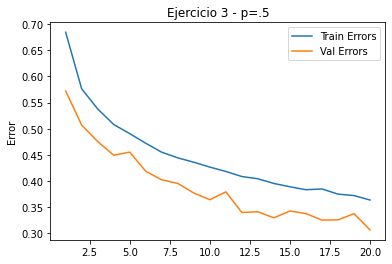

In [5]:
def ejercicio_3():
  (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

  # Normalizamos
  train_images, test_images = train_images / 255.0, test_images / 255.0

  # Separamos los train y val sets
  train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=0)

  # Creamos el modelo
  img_height = 32
  img_width = 32
  data_augmentation = keras.Sequential(
      [
            layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
            layers.RandomRotation(0.1),
            layers.RandomZoom(0.1),
      ]
  )

  model = models.Sequential()
  model.add(data_augmentation)
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  # Dropout
  model.add(layers.Dropout(.5))
  model.add(layers.Flatten())
  model.add(layers.Dense(64))
  # Dropout
  model.add(layers.Dropout(.5))
  model.add(layers.Dense(128))
  model.add(layers.Dense(128))
  model.add(layers.Dense(10))

  # Compilamos el modelo
  model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

  history = model.fit(
      train_images, 
      train_labels, 
      epochs=20, 
      validation_data=(val_images, val_labels)
  )
  
  test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
  print(f"Modelo Final - Test Error: {1 - test_acc}")
  
  return model, history

model3, history3 = ejercicio_3()
plot_error_model(model3, history3, 'Ejercicio 3 - p=.5')

# Conclusiones
Como podemos ver el uso de data augmentation no genero mejoras al modelo, en realidad empeoro el error de test. Solo podemos destacar que el uso de data augmentation mejoro el sobreajuste del model, que bueno esto es bueno pero si en nuestro nuevo modelo aumenta el error de test, me parece mejor no realizar este metodo y dejar el modelo como estaba ya que podia realizar mejores predicciones.

Decidi para este ejercicio, usar los 2 valores de p en la capa de Dropout para poder compararlos. Primero que nada en ambos casos no hay mejoras del error en relacion al ejercicio anterior. Pero podemos ver que con data augmentation, el modelo con `p=.2` tiene un menor error que el modelo con `p=.5`. 

**Por esta razon, en el ejercicio 5 voy a utilizar `p=.2` ya que nos dio mejores resultados con data augmentation**.

# Ejercicio 4

Epoch 1/10
1250/1250 [==============================] - 8s 6ms/step - loss: 1.4682 - accuracy: 0.4657 - val_loss: 1.2120 - val_accuracy: 0.5724
Epoch 2/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.9926 - accuracy: 0.6496 - val_loss: 0.8886 - val_accuracy: 0.6877
Epoch 3/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.8121 - accuracy: 0.7138 - val_loss: 0.7968 - val_accuracy: 0.7238
Epoch 4/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.6806 - accuracy: 0.7622 - val_loss: 0.7929 - val_accuracy: 0.7262
Epoch 5/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.5794 - accuracy: 0.7948 - val_loss: 0.7660 - val_accuracy: 0.7384
Epoch 6/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.4918 - accuracy: 0.8272 - val_loss: 0.7972 - val_accuracy: 0.7400
Epoch 7/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.4195 - accuracy: 0.8506 - val_loss: 0.8812 - val_accuracy:

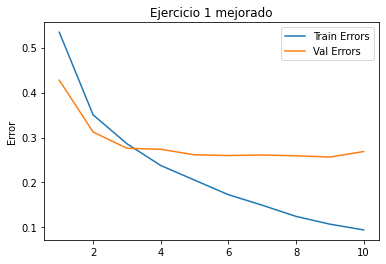

In [9]:
def ejercicio_1_mejorado():
  (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

  # Normalizamos
  train_images, test_images = train_images / 255.0, test_images / 255.0

  # Separamos los train y val sets
  train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=0)

  # Creamos el modelo
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(layers.Flatten())
  # model.add(layers.Dense(64))
  # model.add(layers.Dense(128))
  model.add(layers.Dense(128))
  model.add(layers.Dense(10))

  # Compilamos el modelo
  model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

  history = model.fit(
      train_images, 
      train_labels, 
      epochs=10, 
      validation_data=(val_images, val_labels)
  )
  
  test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
  print(f"Modelo Final - Test Error: {1 - test_acc}")
  
  return model, history

model1_mejorado, model1_mejorado = ejercicio_1_mejorado()
plot_error_model(model1_mejorado, model1_mejorado, 'Ejercicio 1 mejorado')

# Conclusiones
Agregando una segunda capa `model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))`, duplicando la cantidad de filtros del ultimo par de capas conv (64 => 128) y por ultimo sacando 2 capa densa se logro una mejora del modelo de un 3% aprox.

En mi opinion, al agregar una capa de 32 filtros, le permitimos al modelo obtener mas informacion al principio para luego poder generalizarla mejor cuando se van aumentando los filtros y avanzamos a las siguientes capas.


Tambien queria destacar que con otro diseño del modelo (utilizando Dropout), el error de test fue mucho menor al modelo actual, siendo este: `Modelo Final - Test Error: 0.23659998178482056`.

Este fue el diseño del modelo:
```python
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.Flatten())
# Dropout
model.add(layers.Dropout(.5))
model.add(layers.Dense(64))
model.add(layers.Dense(128))
model.add(layers.Dense(128))
model.add(layers.Dense(10))
```
Este modelo lo deje como comentario en la conclusion ya que no sabia si era valido ya que estaba usando Dropout.

In [11]:
def ejercicio_2_mejorado():
  p_vals = [.2, .5]
  ms = {}
  for p in p_vals:
    md = models.Sequential()
    md.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    md.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
    md.add(layers.MaxPooling2D((2, 2)))
    md.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    md.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    md.add(layers.MaxPooling2D((2, 2)))
    md.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    md.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    # Dropout
    md.add(layers.Dropout(p))
    md.add(layers.Flatten())
    # md.add(layers.Dense(64))
    md.add(layers.Dense(128))
    # Dropout
    # md.add(layers.Dropout(p))
    md.add(layers.Dense(10))

    ms[p] = md
  
  models_results = []
  for p, model in ms.items():
    (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

    # Normalizamos
    train_images, test_images = train_images / 255.0, test_images / 255.0

    # Separamos los train y val sets
    train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=0)

    # Compilamos el modelo
    model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

    history = model.fit(
        train_images, 
        train_labels, 
        epochs=20, 
        validation_data=(val_images, val_labels)
    )
    
    test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
    print(f"Modelo Final p = {p} - Test Error: {1 - test_acc}")

    models_results.append((model, history))

  return models_results

Epoch 1/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.5312 - accuracy: 0.4375 - val_loss: 1.2082 - val_accuracy: 0.5668
Epoch 2/20
1250/1250 [==============================] - 7s 5ms/step - loss: 1.0580 - accuracy: 0.6266 - val_loss: 0.9362 - val_accuracy: 0.6684
Epoch 3/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.8650 - accuracy: 0.6974 - val_loss: 0.8498 - val_accuracy: 0.7064
Epoch 4/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.7536 - accuracy: 0.7370 - val_loss: 0.7931 - val_accuracy: 0.7268
Epoch 5/20
1250/1250 [==============================] - 7s 5ms/step - loss: 0.6688 - accuracy: 0.7658 - val_loss: 0.7882 - val_accuracy: 0.7327
Epoch 6/20
1250/1250 [==============================] - 7s 5ms/step - loss: 0.6029 - accuracy: 0.7903 - val_loss: 0.7437 - val_accuracy: 0.7521
Epoch 7/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.5372 - accuracy: 0.8092 - val_loss: 0.7872 - val_accuracy:

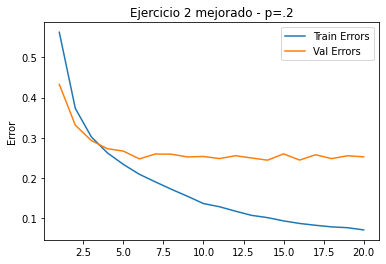

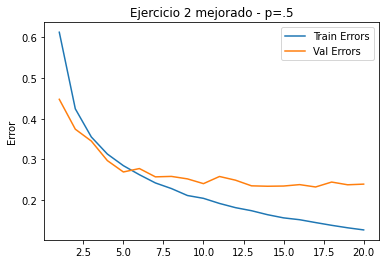

In [12]:
models_results = ejercicio_2_mejorado()
_model1_mejorado, _history1_mejorado = models_results[0]
plot_error_model(_model1_mejorado, _history1_mejorado, 'Ejercicio 2 mejorado - p=.2')
_model2_mejorado, _history2_mejorado = models_results[1]
plot_error_model(_model2_mejorado, _history2_mejorado, 'Ejercicio 2 mejorado - p=.5')

# Conclusiones
En este ejercicio aplique las mismas mejoras que en el ejercicio 1 y podemos notar 2 cosas:

Primero, las mejoras afectaron distintos a los modelos. Para el modelo con `p=.2` no tenemos una disminucion del sobreajuste pero si resulto en una mejora del error de test en 1% aproximadamente.

Luego para el otro modelo, las mejoras fueron mas utiles. Se nota (muy poco) una disminucion del sobreajuste y tambien logramos disminuir el error en un 3%.

Capaz otras mejoras que podemos hacer es utilizar los 2 valores de p en las capas de Dropout. **Esto lo hice en siguiente ejercicio**.

Epoch 1/20
1250/1250 [==============================] - 10s 7ms/step - loss: 1.7327 - accuracy: 0.3629 - val_loss: 1.4848 - val_accuracy: 0.4536
Epoch 2/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.4451 - accuracy: 0.4739 - val_loss: 1.2423 - val_accuracy: 0.5505
Epoch 3/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.3158 - accuracy: 0.5268 - val_loss: 1.1389 - val_accuracy: 0.5964
Epoch 4/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.2429 - accuracy: 0.5564 - val_loss: 1.0332 - val_accuracy: 0.6367
Epoch 5/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.1799 - accuracy: 0.5796 - val_loss: 1.0758 - val_accuracy: 0.6156
Epoch 6/20
1250/1250 [==============================] - 8s 7ms/step - loss: 1.1414 - accuracy: 0.5998 - val_loss: 1.1098 - val_accuracy: 0.6181
Epoch 7/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.1037 - accuracy: 0.6109 - val_loss: 1.0031 - val_accuracy

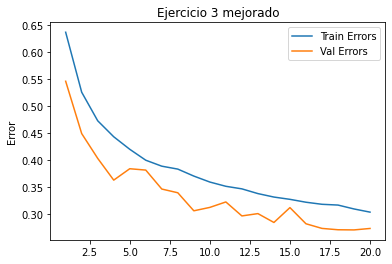

In [7]:
def ejercicio_3_mejorado():
  (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

  # Normalizamos
  train_images, test_images = train_images / 255.0, test_images / 255.0

  # Separamos los train y val sets
  train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=0)

  # Creamos el modelo
  img_height = 32
  img_width = 32
  data_augmentation = keras.Sequential(
      [
            layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
            layers.RandomRotation(0.1),
            layers.RandomZoom(0.1)
      ]
  )

  model = models.Sequential()
  model.add(data_augmentation)
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
  # Dropout
  model.add(layers.Dropout(.5))
  model.add(layers.Flatten())
  model.add(layers.Dense(64))
  # Dropout
  model.add(layers.Dropout(.2))
  model.add(layers.Dense(128))
  model.add(layers.Dense(128))
  model.add(layers.Dense(10))

  # Compilamos el modelo
  model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

  history = model.fit(
      train_images, 
      train_labels, 
      epochs=20, 
      validation_data=(val_images, val_labels)
  )
  
  test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
  print(f"Modelo Final - Test Error: {1 - test_acc}")
  
  return model, history

model3_mejorado, history3_mejorado = ejercicio_3_mejorado()
plot_error_model(model3_mejorado, history3_mejorado, 'Ejercicio 3 mejorado')

# Conclusiones
En este ejercicio se me ocurrio aplicar los mismos cambios en las capas que hice en el ejercicio 1, pero ademas cambiar los valores de p. Usando `p=.5` despues de la última capa convolucional y usar `p=.2` luego de la primer capa densa. Esto llevo a una mejora del 3% aproximadamente, que era lo que estabamos buscando.

Podemos ver que el sobreajuste es igual que en ejercicio anterior y podemos concluir que estas mejoras solo disminuyeron el error de test.

# Ejercicio 5

Epoch 1/20
1250/1250 [==============================] - 9s 7ms/step - loss: 1.6918 - accuracy: 0.3746 - val_loss: 1.3677 - val_accuracy: 0.4835
Epoch 2/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.4199 - accuracy: 0.4834 - val_loss: 1.2392 - val_accuracy: 0.5604
Epoch 3/20
1250/1250 [==============================] - 7s 6ms/step - loss: 1.3072 - accuracy: 0.5318 - val_loss: 1.1784 - val_accuracy: 0.5787
Epoch 4/20
1250/1250 [==============================] - 7s 6ms/step - loss: 1.2338 - accuracy: 0.5624 - val_loss: 1.1425 - val_accuracy: 0.6088
Epoch 5/20
1250/1250 [==============================] - 7s 6ms/step - loss: 1.1766 - accuracy: 0.5823 - val_loss: 1.0526 - val_accuracy: 0.6388
Epoch 6/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.1385 - accuracy: 0.5975 - val_loss: 1.1008 - val_accuracy: 0.6232
Epoch 7/20
1250/1250 [==============================] - 9s 7ms/step - loss: 1.1006 - accuracy: 0.6133 - val_loss: 0.9705 - val_accuracy:

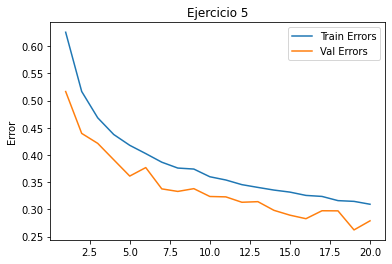

In [13]:
def ejercicio_5():
  (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

  # Normalizamos
  train_images, test_images = train_images / 255.0, test_images / 255.0

  # Separamos los train y val sets
  train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=0)

  # Creamos el modelo
  img_height = 32
  img_width = 32
  data_augmentation = keras.Sequential(
      [
            layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
            layers.RandomRotation(0.1),
            layers.RandomZoom(0.1),
            layers.RandomContrast(.05)
      ]
  )

  model = models.Sequential()
  model.add(data_augmentation)
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  # Dropout
  model.add(layers.Dropout(.2))
  model.add(layers.Flatten())
  model.add(layers.Dense(64))
  # Dropout
  model.add(layers.Dropout(.2))
  model.add(layers.Dense(128))
  model.add(layers.Dense(128))
  model.add(layers.Dense(10))

  # Compilamos el modelo
  model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

  history = model.fit(
      train_images, 
      train_labels, 
      epochs=20, 
      validation_data=(val_images, val_labels)
  )
  
  test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
  print(f"Modelo Final - Test Error: {1 - test_acc}")
  
  return model, history

model5, history5 = ejercicio_5()
plot_error_model(model5, history5, 'Ejercicio 5')

# Conclusiones
Como comente en el ejercicio 3, en este ejercicio decidi usar `p=.2` para la capa de Dropout.

En este ejercicio lei la documentacion de que tipos de data augmentation podia agregar y intente utilizar `Resizing` y `Rescaling`. Esto llevo a generar un peor modelo, con un error de 80% o mas. Supongo que al modificar el tamaño de las imagenes con estas funciones empeoramos las cosas. Luego intente modificar el brillo pero no lo puede hacer funcionar. Por ultimo decidi usar solo `RandomContrast`.


Al cambiar el constraste de la imagen con un `factor=.05` de forma random, resulto en el modelo una mejora del 2% y no hay indicios de un aumento de sobreajuste.
